In [1]:
import torch

In [11]:
input_tensor = torch.Tensor([[[1,2,3,4,5], [6,7,8,9,10]], [[11,12,13,14,15], [16,17,18,19,20]]])

In [13]:
input_tensor.size()

torch.Size([2, 2, 5])

In [14]:
indexing_tensor = torch.Tensor([[0,2], [2,4]]).type(torch.LongTensor)

In [18]:
indexing_tensor

tensor([[0, 2],
        [2, 4]])

In [27]:
input_tensor[0, indexing_tensor[0]]

IndexError: index 2 is out of bounds for dimension 0 with size 2

In [23]:
indexing_tensor[0]

tensor([0, 2])

In [1]:
import re

# 로그 파일 경로
log_file_path = '/home/jgryu/Weight_compression/nic_weight_comp/checkpoint/exp_NIC_Fair_model_TCM_image_quality_2_seed_100.0_batch_size_8_radius_denominator_8_total_iter_200000/logs'  # 로그 파일의 경로로 변경하세요

# 값을 저장할 리스트
log_values_list = []

# 정규 표현식을 사용하여 값을 추출하는 함수
def extract_log_values(log_line):
    pattern = r'Train iter\. (\d+)/\d+ \(\d+(\.\d+)?%\):\s*Loss:\s*([\d.]+)\s*\|\s*MSE loss:\s*([\d.]+)\s*\|\s*Bpp loss:\s*([\d.]+)'
    match = re.search(pattern, log_line)
    if match:
        train_iter = match.group(1)
        loss = match.group(3)
        mse_loss = match.group(4)
        bpp_loss = match.group(5)
        return {
            'Train iter': train_iter,
            'Loss': loss,
            'MSE loss': mse_loss,
            'Bpp loss': bpp_loss
        }
    return None

# 로그 파일에서 모든 줄을 읽고 값 추출
with open(log_file_path, 'r') as log_file:
    for line in log_file:
        log_values = extract_log_values(line)
        if log_values:
            log_values_list.append(log_values)

# 결과 출력
for index, values in enumerate(log_values_list):
    print(f"Entry {index + 1}:")
    for key, value in values.items():
        print(f"{key}: {value}")
    print()  # 각 항목 사이에 빈 줄 추가

Entry 1:
Train iter: 4
Loss: 207.298599
MSE loss: 0.897160
Bpp loss: 3.12

Entry 2:
Train iter: 4
Loss: 207.298599
MSE loss: 0.897160
Bpp loss: 3.12

Entry 3:
Train iter: 4
Loss: 207.298599
MSE loss: 0.897160
Bpp loss: 3.12

Entry 4:
Train iter: 4
Loss: 207.298599
MSE loss: 0.897160
Bpp loss: 3.12

Entry 5:
Train iter: 4
Loss: 207.298599
MSE loss: 0.897160
Bpp loss: 3.12

Entry 6:
Train iter: 4
Loss: 201.085251
MSE loss: 0.870355
Bpp loss: 3.00

Entry 7:
Train iter: 5000
Loss: 120.263809
MSE loss: 0.515044
Bpp loss: 3.05

Entry 8:
Train iter: 10000
Loss: 51.613026
MSE loss: 0.212770
Bpp loss: 3.19

Entry 9:
Train iter: 15000
Loss: 33.424709
MSE loss: 0.132833
Bpp loss: 3.19

Entry 10:
Train iter: 20000
Loss: 51.686787
MSE loss: 0.211408
Bpp loss: 3.57

Entry 11:
Train iter: 25000
Loss: 29.001705
MSE loss: 0.110803
Bpp loss: 3.78

Entry 12:
Train iter: 30000
Loss: 10.931884
MSE loss: 0.031117
Bpp loss: 3.85

Entry 13:
Train iter: 35000
Loss: 7.633004
MSE loss: 0.014963
Bpp loss: 4.23

E

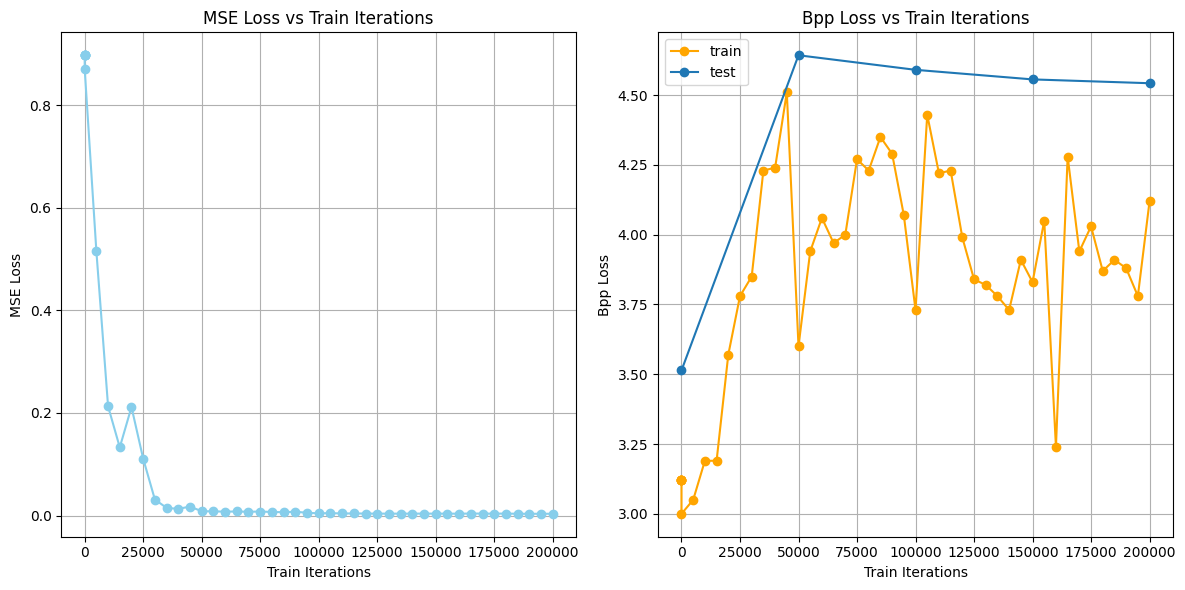

In [6]:
import matplotlib.pyplot as plt

# 예시로 사용할 로그 값 리스트 (이 부분은 실제로 추출한 값으로 대체하세요)
# log_values_list = [
#     {'Train iter': '150000', 'Loss': '4.659247', 'MSE loss': '0.003636', 'Bpp loss': '3.83'},
#     {'Train iter': '160000', 'Loss': '4.550123', 'MSE loss': '0.003500', 'Bpp loss': '3.70'},
#     {'Train iter': '170000', 'Loss': '4.400987', 'MSE loss': '0.003200', 'Bpp loss': '3.50'},
#     # 추가 데이터...
# ]

# Train iter, MSE loss, Bpp loss 데이터 추출
train_iters = [int(entry['Train iter']) for entry in log_values_list]
mse_losses = [float(entry['MSE loss']) for entry in log_values_list]
bpp_losses = [float(entry['Bpp loss']) for entry in log_values_list]

# 그래프 그리기
plt.figure(figsize=(12, 6))

# MSE loss 그래프
plt.subplot(1, 2, 1)  # 1행 2열의 첫 번째 서브플롯
plt.plot(train_iters, mse_losses, marker='o', linestyle='-', color='skyblue')
plt.title('MSE Loss vs Train Iterations')
plt.xlabel('Train Iterations')
plt.ylabel('MSE Loss')
plt.grid()

# Bpp loss 그래프
plt.subplot(1, 2, 2)  # 1행 2열의 두 번째 서브플롯
plt.plot(train_iters, bpp_losses, marker='o', linestyle='-', color='orange', label='train')
plt.plot(test, average_bit_rate_list, marker='o', linestyle='-', label='test')
plt.title('Bpp Loss vs Train Iterations')
plt.xlabel('Train Iterations')
plt.ylabel('Bpp Loss')
plt.legend()
plt.grid()

# 서브플롯 전체 보여주기
plt.tight_layout()
plt.show()

In [3]:
import re

# 로그 파일 경로
# log_file_path = 'path/to/your/logfile.log'  # 로그 파일의 경로로 변경하세요

# 값을 저장할 리스트
average_bit_rate_list = []

# 정규 표현식을 사용하여 Average_Bit-rate 값을 추출하는 함수
def extract_average_bit_rate(log_line):
    pattern = r'Average_Bit-rate:\s*([\d.]+)\s*bpp'
    match = re.search(pattern, log_line)
    if match:
        return float(match.group(1))
    return None

# 로그 파일에서 모든 줄을 읽고 Average_Bit-rate 값 추출
with open(log_file_path, 'r') as log_file:
    for line in log_file:
        average_bit_rate_value = extract_average_bit_rate(line)
        if average_bit_rate_value is not None:
            average_bit_rate_list.append(average_bit_rate_value)

# 결과 출력
print("Extracted Average Bit-rate values:")
for index, value in enumerate(average_bit_rate_list):
    print(f"Entry {index + 1}: {value} bpp")

Extracted Average Bit-rate values:
Entry 1: 3.5136 bpp
Entry 2: 4.6429 bpp
Entry 3: 4.5907 bpp
Entry 4: 4.5564 bpp
Entry 5: 4.5427 bpp


In [4]:
test = [4, 50000, 100000, 150000, 200000]